In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# step 2 load data
np.random.seed(42)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1) 
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75]) 

In [7]:
noise = np.random.normal(0, 5, size=true_salaries.shape) 
Y = true_salaries + noise # variable with noise

In [ ]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [13]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [19]:
# step 5 slope and intercept of model
a=model.coef_[0]
b=model.intercept_
print("model coefficient: ",a)
print("model intercept: ",b)

model coefficient:  0.0
model intercept:  25.834848216909297


In [21]:
# Step 6 line equation
print(f"Equation of line : Y = {a:.2f}X + {b:.2f}")

Equation of line : Y = 0.00X + 25.83


In [33]:
Y_pred = model.predict(X_poly)

In [35]:
# mean square error
mse=mean_squared_error(Y,Y_pred)
print(f"Mean square error is: {mse:.4f}")

Mean square error is: 11.4742


In [37]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean absolute error is: {mae:.4f}")

Mean absolute error is: 2.9843


In [41]:
# root mean squared error
rmse=np.sqrt(mse)
print(f"Root Mean Square error is: {rmse:.4f}")

Root Mean Square error is: 3.3874


In [43]:
r2=r2_score(Y,Y_pred)
print(f"r2 Score is: {r2:.4f}")

r2 Score is: 0.9467


In [45]:
# adjusted r square
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {adj_r2:.4f}")

Adjusted R-squared: 0.9400


In [47]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:32:04   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\vani1\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


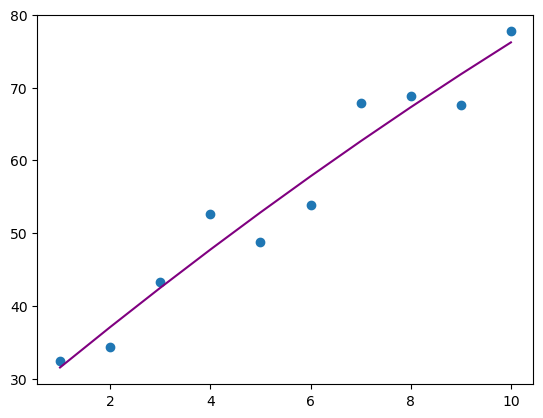

In [27]:
#create scatterplot of x vs. y
plt.scatter(X, Y)

#add line to show fitted polynomial regression model
plt.plot(X, y_pred, color='purple')